# 卒業研究10：ロジスティック回帰とニューラルネットワークの限界
#### 坂西和也

# データの読み込み


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# CSVファイルを読み込む
data_path = '/home/taichi/Documents/BANZAI/masuda/'
data = pd.read_csv(data_path + 'EuF3_data.csv' , sep='\t')

In [2]:
data.head()

,Velocity (mm/s),EuF3_w0T7_8S5_85,EuF3_w1T7_8S5_85,EuF3_w2T7_8S5_85,EuF3_w3T7_8S5_85
0,-20.000000,373.275017,89.683715,59.446287,38.924525
1,-19.685039,373.239700,90.317998,59.679393,38.652381
2,-19.370079,373.287540,90.972404,59.770151,38.261999
3,-19.055118,373.344075,91.617714,59.701970,37.806983
4,-18.740157,373.326817,92.212957,59.470467,37.346615


# データの可視化

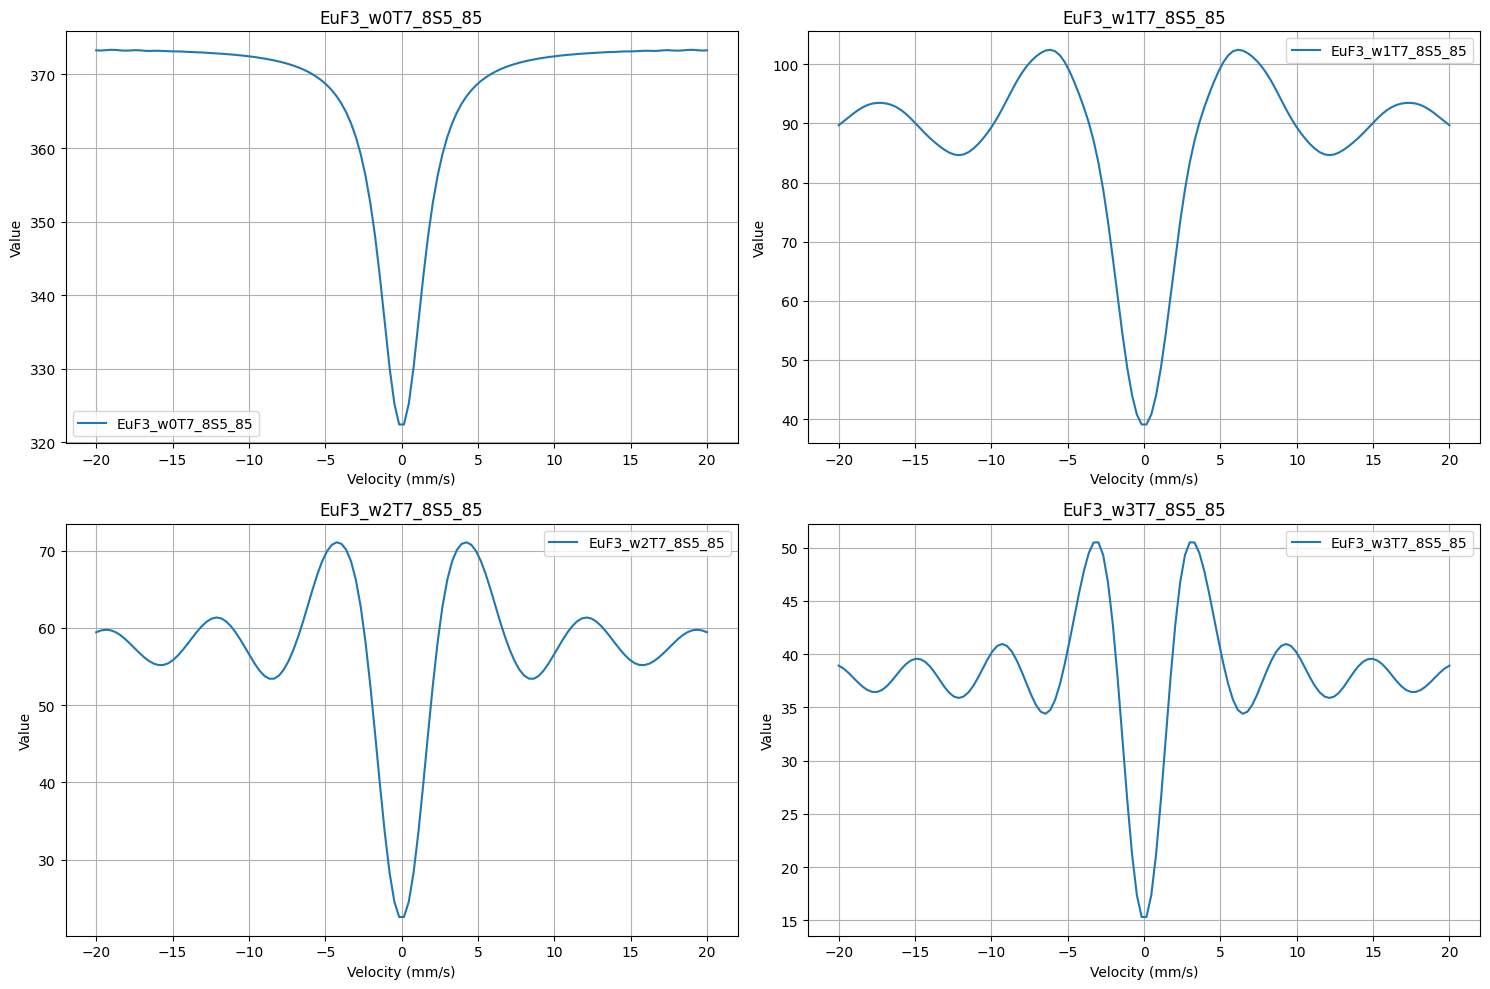

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# x軸のデータ
x = data['Velocity (mm/s)']

# カラムのリストを取得
columns_to_plot = data.columns[1:].tolist()

# 2x2の配置でグラフを表示
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for ax, column in zip(axes.ravel(), columns_to_plot):
    ax.plot(x, data[column], label=column)
    ax.set_title(column)
    ax.set_xlabel('Velocity (mm/s)')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


# データの圧縮0.1倍
データを0.1倍する．

ここでポイントになるのはデータを0.1倍に圧縮しても，ノイズの標準偏差は0.1倍にならないことである．

つまり$Y$を元データに乱数を乗せたデータ，$X$を元データとして$$ Y|X \sim N(X, X) $$と仮定する．

このとき$$\sqrt{Var[Y|X]} = \sqrt{X}$$である．

ここで$X\to0.1X $としたとき$$\sqrt{Var[Y|0.1X]} = \sqrt{0.1X} \simeq 0.316 \sqrt{Var[Y|X]}$$となる．

つまり，元データを0.1倍に圧縮すると，ノイズの標準偏差は約0.316倍になり乱数の影響が大きくなってしまう．

実験でも実験時間が短くなると，元データの値が小さくなり，ノイズの影響が大きくなる．

前回の結果，元データを用いたロジスティック回帰ではうまく分類できたが，今回のように元データを0.1倍に圧縮したときどうなるかを観察していきたい．


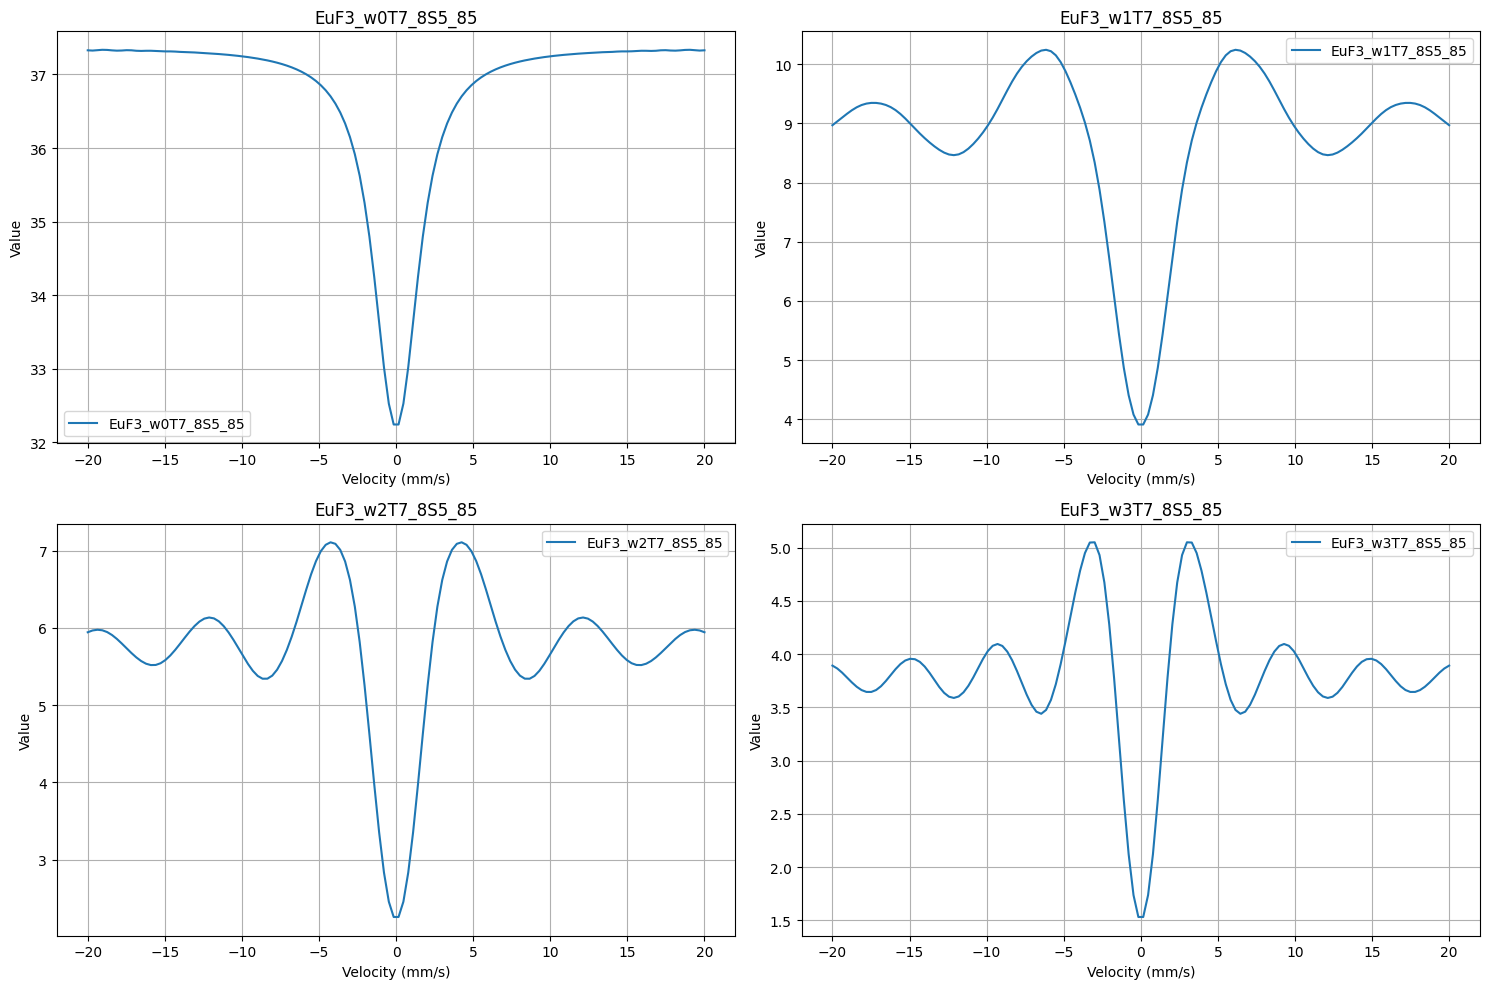

In [4]:
# 2列目から5列目までのデータの値を10分の1にする
data[data.columns[1:5]] = data[data.columns[1:5]] / 10

# 圧縮後のデータを表示
data

# x軸のデータ
x = data['Velocity (mm/s)']

# カラムのリストを取得
columns_to_plot = data.columns[1:].tolist()

# 2x2の配置でグラフを表示
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for ax, column in zip(axes.ravel(), columns_to_plot):
    ax.plot(x, data[column], label=column)
    ax.set_title(column)
    ax.set_xlabel('Velocity (mm/s)')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

# データにノイズ付加

In [5]:
import pandas as pd
import numpy as np

# 0行目のデータを取得
row_at_zero_index = data.iloc[0]

# データをコピーして新しいデータフレームを作成
data_noisy = data.copy()

# カラムのリストを取得
columns_to_plot = data.columns[1:].tolist()

# 各カラムのデータに正規乱数のノイズを追加
for column in columns_to_plot:
    np.random.seed(0)
    # 正規乱数のノイズは、平均0、分散は各x軸のデータのy軸値
    variance = data[column].values
    noise = np.random.normal(0, np.sqrt(variance))
    data_noisy[column] = data[column] + noise

In [6]:
row_at_zero_index

Velocity (mm/s)    -20.000000
EuF3_w0T7_8S5_85    37.327502
EuF3_w1T7_8S5_85     8.968372
EuF3_w2T7_8S5_85     5.944629
EuF3_w3T7_8S5_85     3.892452
Name: 0, dtype: float64

In [7]:
columns_to_plot

['EuF3_w0T7_8S5_85',
 'EuF3_w1T7_8S5_85',
 'EuF3_w2T7_8S5_85',
 'EuF3_w3T7_8S5_85']

In [8]:
len(data)

128

# 付加したデータの可視化

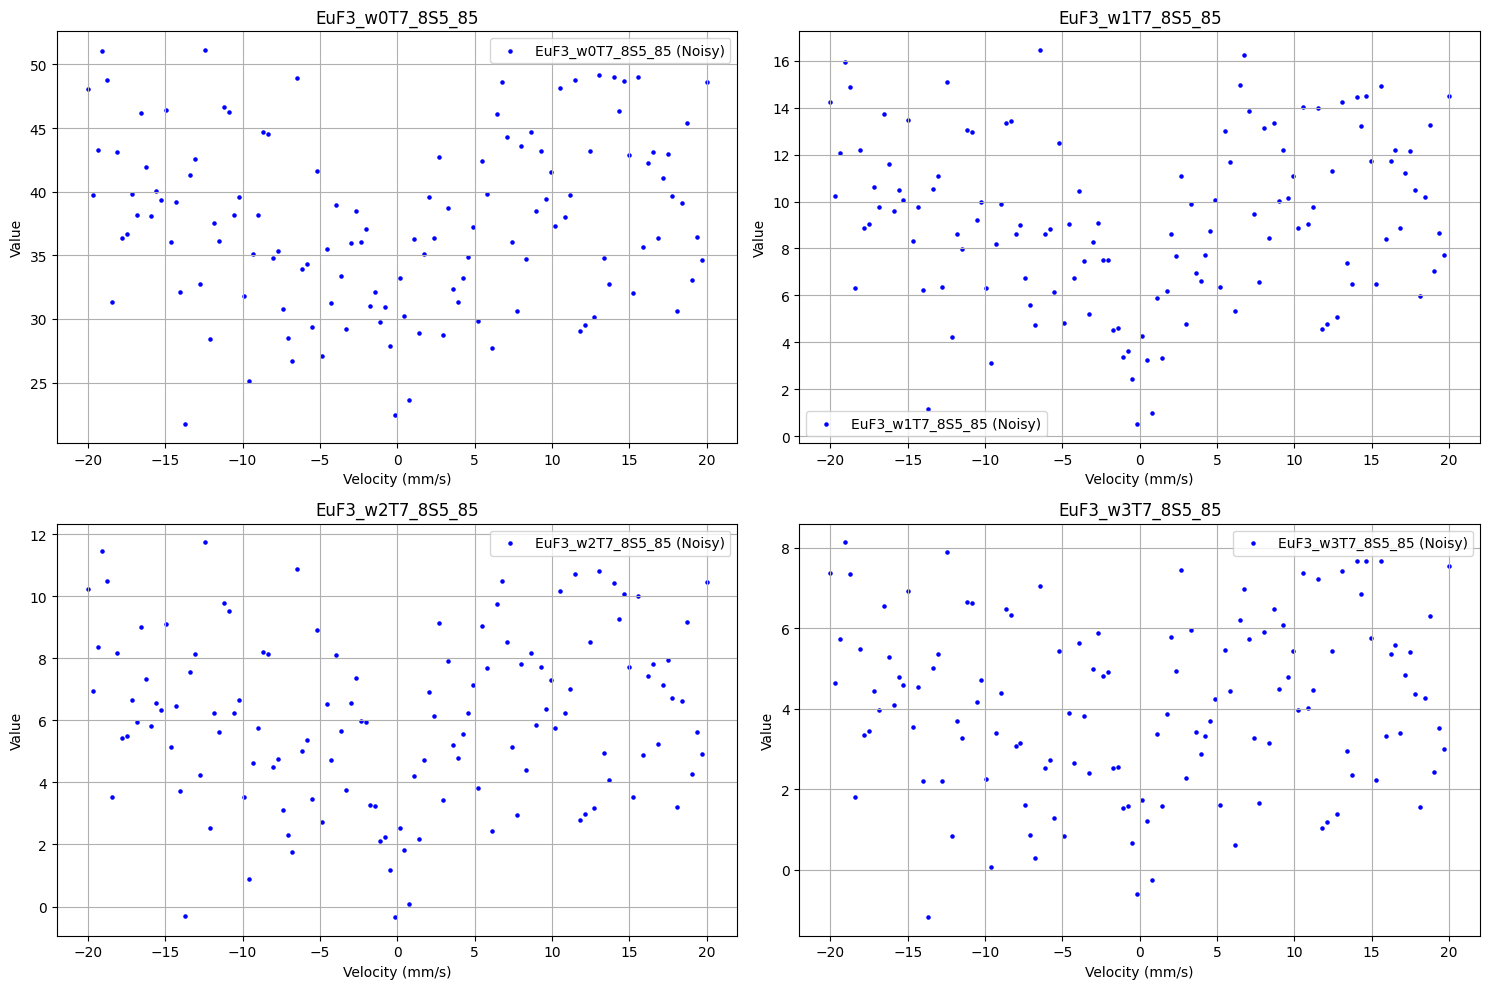

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# x軸のデータ
x = data['Velocity (mm/s)']

# 2x2の配置で散布図をプロット
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for ax, column in zip(axes.ravel(), columns_to_plot):
    ax.scatter(x, data_noisy[column], label=column + ' (Noisy)', color='blue', s=5)
    ax.set_title(column)
    ax.set_xlabel('Velocity (mm/s)')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


# ランダムなデータの作成

In [10]:
# 新しいデータフレームを作成
data_random_noise = pd.DataFrame()
data_random_noise['Velocity (mm/s)'] = data['Velocity (mm/s)']

np.random.seed(00)

# 2列目から5列目までのカラムにランダムなノイズを追加
for column in columns_to_plot:
    mean = row_at_zero_index[column]
    variance = row_at_zero_index[column]
    noise = np.random.normal(mean, np.sqrt(variance), size=data[column].shape)
    data_random_noise[column] = noise


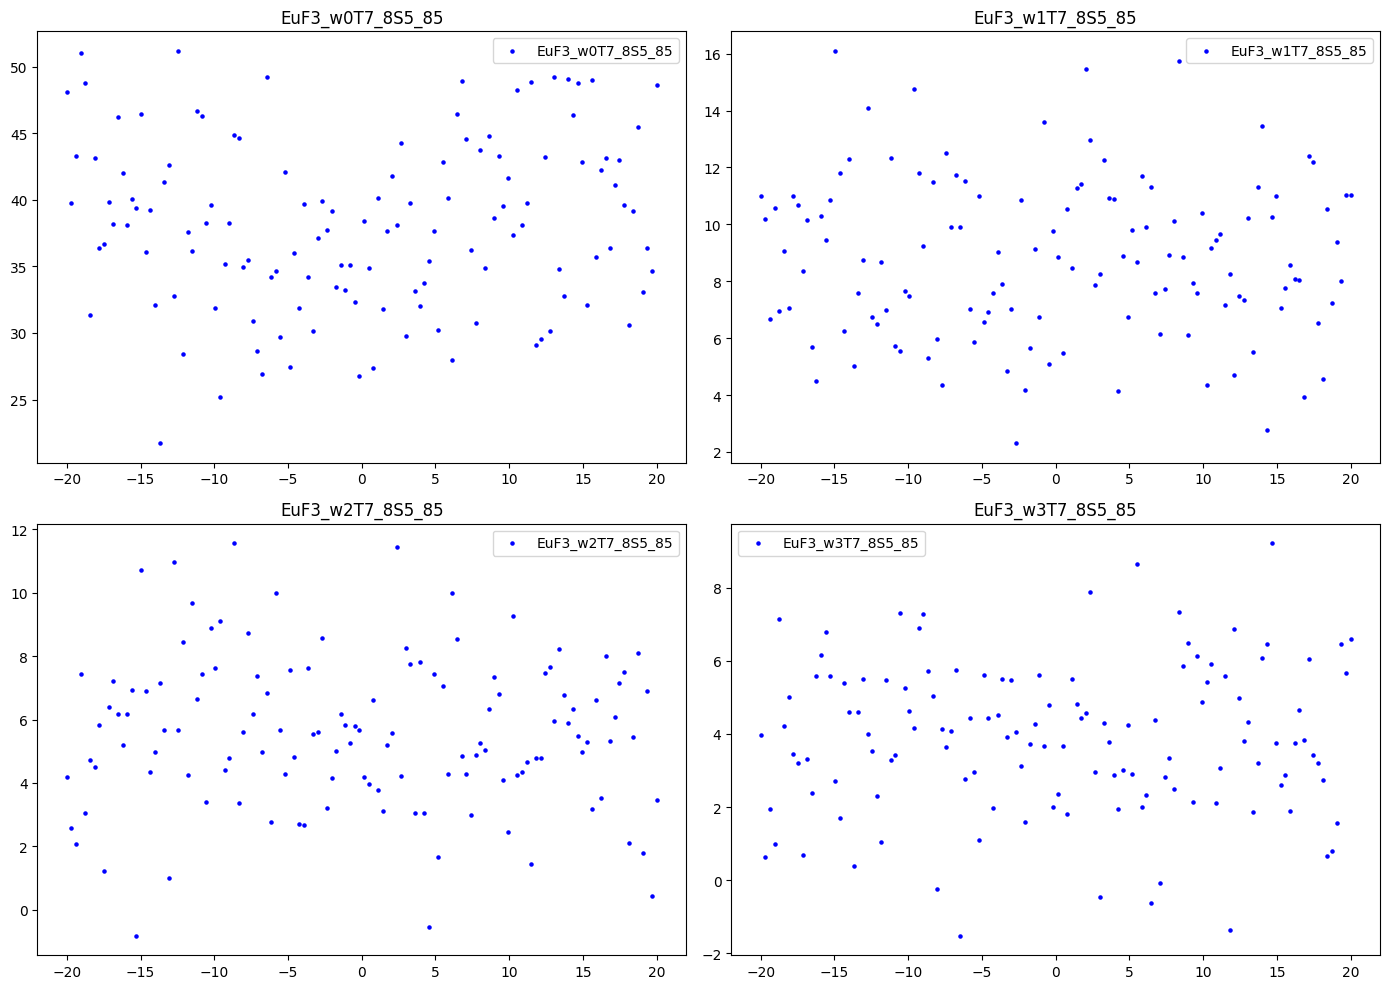

In [11]:
import matplotlib.pyplot as plt

# 可視化
plt.figure(figsize=(14, 10))

for idx, column in enumerate(data_random_noise.columns[1:]):
    plt.subplot(2, 2, idx+1)
    plt.scatter(data_random_noise['Velocity (mm/s)'], data_random_noise[column], label=column, color='blue', s=5)
    plt.title(column)
    plt.legend()

plt.tight_layout()
plt.show()

# 2つのデータの比較
ヒストグラムを見た限り判別は難しい．

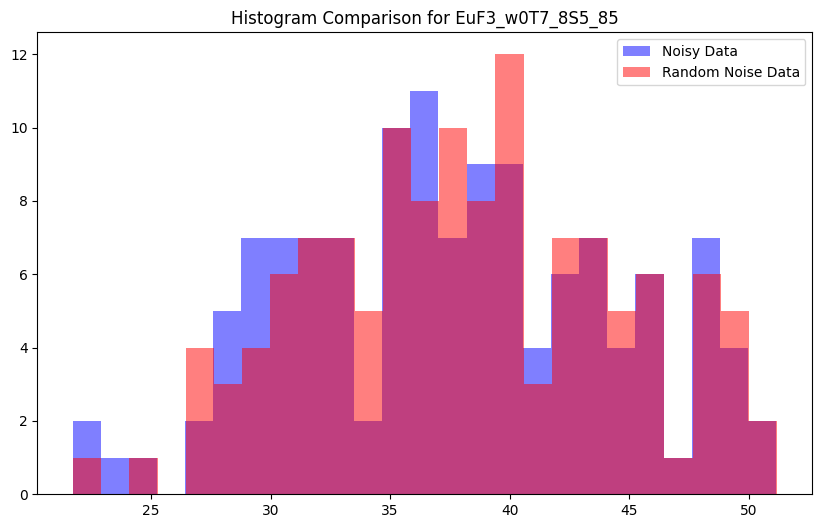

In [12]:
import matplotlib.pyplot as plt

# ヒストグラムの設定
plt.figure(figsize=(10, 6))

# data_noisyの2列目のデータをヒストグラムでプロット
plt.hist(data_noisy[columns_to_plot[0]], bins=25, alpha=0.5, label='Noisy Data', color='blue')

# data_random_noiseの2列目のデータをヒストグラムでプロット
plt.hist(data_random_noise[columns_to_plot[0]], bins=25, alpha=0.5, label='Random Noise Data', color='red')

plt.title(f'Histogram Comparison for {columns_to_plot[0]}')
plt.legend()
plt.show()

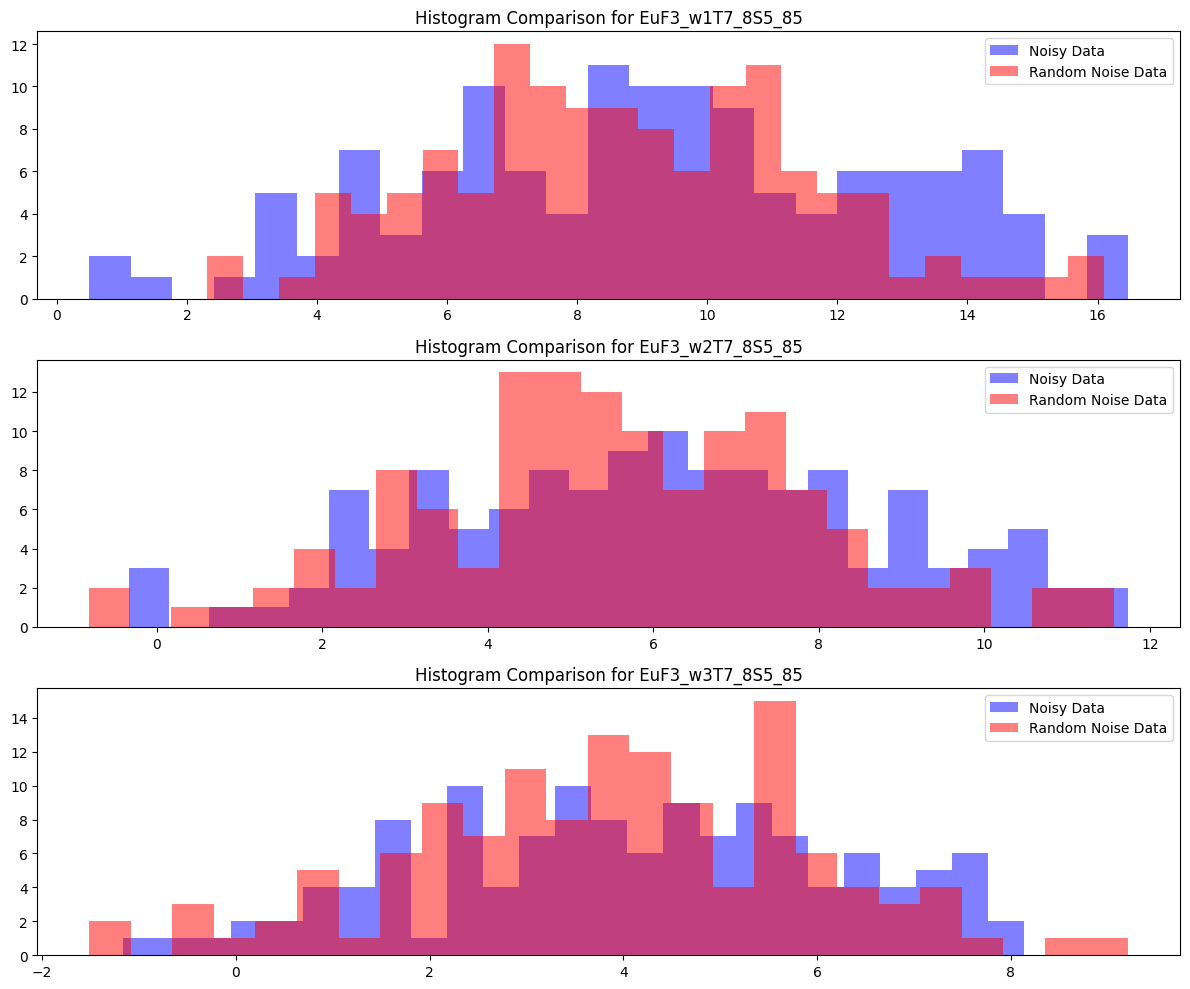

In [13]:
import matplotlib.pyplot as plt

# ヒストグラムの設定
plt.figure(figsize=(12, 10))

for idx, column in enumerate(columns_to_plot[1:4], start=1):
    plt.subplot(3, 1, idx)
    
    # data_noisyのデータをヒストグラムでプロット
    plt.hist(data_noisy[column], bins=25, alpha=0.5, label='Noisy Data', color='blue')
    
    # data_random_noiseのデータをヒストグラムでプロット
    plt.hist(data_random_noise[column], bins=25, alpha=0.5, label='Random Noise Data', color='red')
    
    plt.title(f'Histogram Comparison for {column}')
    plt.legend()

plt.tight_layout()
plt.show()

# データセットの作成

In [14]:
# 空のデータフレームを作成
dataset = pd.DataFrame()

# データ数の設定
number = 25
random_number = 25

# 元データからノイズを付加したデータを作成
for i in range(number):
    np.random.seed(i)
    column_name = f'noisy_{i}'
    # 正規乱数のノイズは、平均0、分散は各x軸のデータのy軸値
    variance = data['EuF3_w0T7_8S5_85'].values
    noise = np.random.normal(0, np.sqrt(variance))
    dataset[column_name] = data['EuF3_w0T7_8S5_85'] + noise

# 乱数のみのデータを作成
for i in range(random_number):
    j = i + number
    np.random.seed(j)
    column_name = f'random_noise_{i}'
    # 正規乱数のノイズは、平均は0行目のデータの値、分散も0行目のデータの値
    noise = np.random.normal(row_at_zero_index['EuF3_w0T7_8S5_85'], np.sqrt(row_at_zero_index['EuF3_w0T7_8S5_85']), size=data['EuF3_w0T7_8S5_85'].shape)
    dataset[column_name] = noise

# 教師信号を作成
y = [1]*number + [0]*random_number

# datasetの最初の列に元データの最初の列を追加
dataset.insert(0, "Velocity (mm/s)", data["Velocity (mm/s)"])

In [15]:
# 確認
dataset.head()

,Velocity (mm/s),noisy_0,noisy_1,noisy_2,noisy_3,noisy_4,noisy_5,noisy_6,noisy_7,noisy_8,...,random_noise_15,random_noise_16,random_noise_17,random_noise_18,random_noise_19,random_noise_20,random_noise_21,random_noise_22,random_noise_23,random_noise_24
0,-20.000000,48.105198,47.251641,34.781268,48.255349,37.636415,40.023236,35.422621,47.655978,37.884728,...,33.615614,35.673551,40.362238,38.900118,32.741528,37.488642,40.900873,32.146483,31.256788,30.954192
1,-19.685039,39.768664,33.586545,36.980217,39.990755,40.378340,35.302574,41.777699,34.477403,43.990981,...,36.556856,37.968084,36.482759,31.777022,45.369950,38.917969,44.849644,45.306098,30.830523,32.312382
2,-19.370079,43.308575,34.101769,24.277181,37.918327,31.244023,52.180100,38.659579,37.529276,25.433299,...,33.144814,38.858132,41.284635,35.014990,44.940948,34.913311,42.349003,42.974065,33.429098,41.391293
3,-19.055118,51.026688,30.778367,47.356772,25.948115,41.572425,35.794077,31.840787,39.824409,28.863550,...,43.001599,31.674878,46.632641,34.059369,27.522070,36.079300,32.444517,41.240177,43.813409,48.463066
4,-18.740157,48.743550,42.620364,26.374705,35.637827,34.776840,38.002403,22.138334,32.512324,23.301009,...,26.058905,40.792536,35.896913,42.570007,28.357696,29.558305,39.844992,30.883456,36.365822,28.519970


In [16]:
y

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

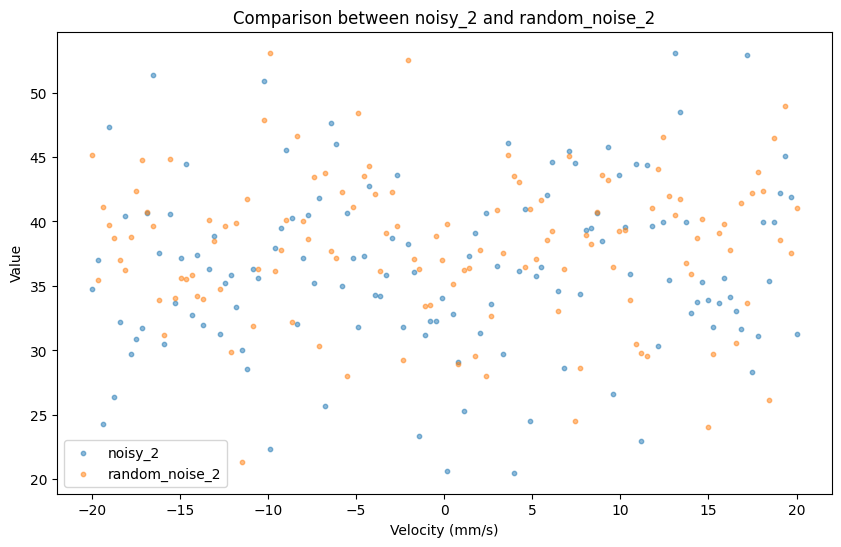

In [17]:
# noisy_2とrandom_noise_2の可視化
plt.figure(figsize=(10, 6))
plt.scatter(dataset["Velocity (mm/s)"], dataset["noisy_2"], label="noisy_2", alpha=0.5, s=10)
plt.scatter(dataset["Velocity (mm/s)"], dataset["random_noise_2"], label="random_noise_2", alpha=0.5, s=10)
plt.xlabel("Velocity (mm/s)")
plt.ylabel("Value")
plt.legend()
plt.title("Comparison between noisy_2 and random_noise_2")
plt.show()

単なる乱数のはずだが，0付近で凹んでいるものもある．

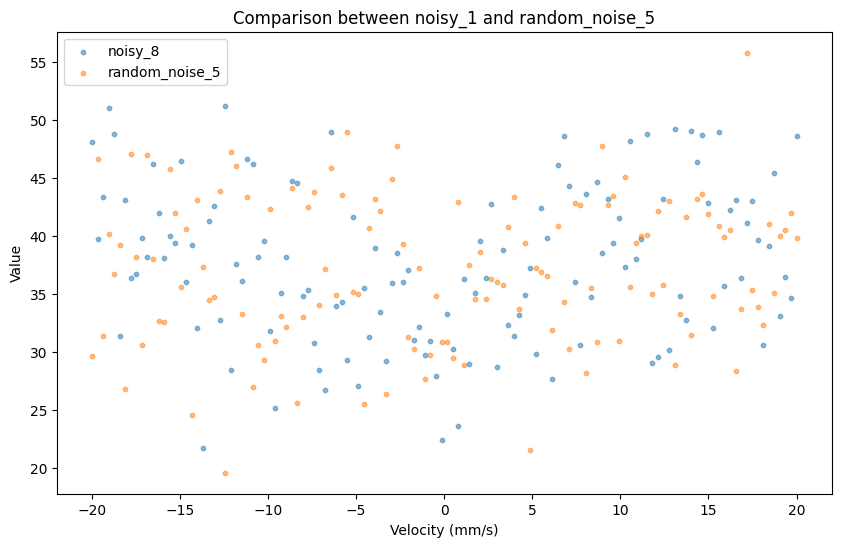

In [18]:
# noisy_8とrandom_noise_5の可視化
plt.figure(figsize=(10, 6))
plt.scatter(dataset["Velocity (mm/s)"], dataset["noisy_0"], label="noisy_8", alpha=0.5, s=10)
plt.scatter(dataset["Velocity (mm/s)"], dataset["random_noise_5"], label="random_noise_5", alpha=0.5, s=10)
plt.xlabel("Velocity (mm/s)")
plt.ylabel("Value")
plt.legend()
plt.title("Comparison between noisy_1 and random_noise_5")
plt.show()

わたしには区別がつかない．

# ロジスティック回帰
128次元のy軸値を入力変数とするロジスティック回帰を行う．

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       0.50      1.00      0.67         5

    accuracy                           0.67        15
   macro avg       0.75      0.75      0.67        15
weighted avg       0.83      0.67      0.67        15



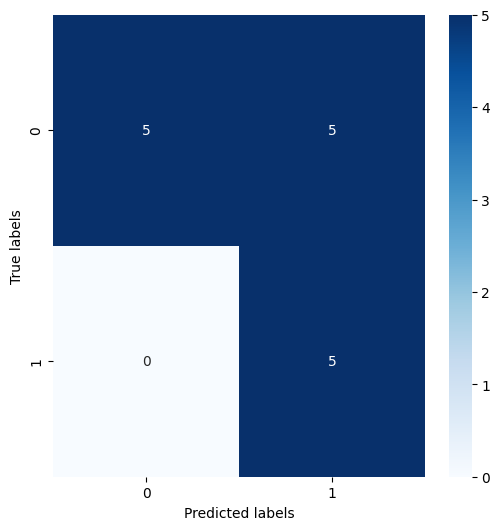

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 入力データとして、各カラムを1つのサンプルとする
X = dataset.drop('Velocity (mm/s)', axis=1)
y = y

# データセットをトレーニングセットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X.T, y, test_size=0.3, random_state=111)

# ロジスティック回帰モデルを訓練
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

# テストデータを使って予測
y_pred = clf.predict(X_test)

# 評価
print(classification_report(y_test, y_pred))

# 混同行列の可視化
plt.figure(figsize=(6, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

## 結果の説明
真陰性：実際に陰性であるものを陰性と判定できたもの

真陽性：実際に陽性であるものを陽性と判定できたもの

偽陽性：実際に陰性であるものを陽性と判定したもの

偽陰性：実際に陽性であるものを陰性と判定したもの

In [20]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
random_noise_8,35.379427,27.533894,27.947898,33.842567,36.003373,38.884688,36.414419,49.612627,36.736187,39.906995,...,21.479509,32.785971,46.608212,41.909082,23.464233,32.680526,31.489743,42.972496,39.252995,45.519957
random_noise_5,29.604616,46.662428,31.396823,40.202444,36.712283,39.183564,26.782521,47.011838,38.148003,30.565031,...,55.781595,35.335110,33.832607,32.348298,40.991103,35.050853,40.001668,40.468508,41.959779,39.798770
random_noise_6,34.793491,35.290745,37.822943,32.494625,35.991940,32.664656,32.579589,48.626374,33.016549,36.801817,...,32.799932,36.977418,33.059560,39.902045,39.022514,35.180425,41.404685,37.001326,33.302584,42.387380
random_noise_9,38.817242,32.761669,27.789298,34.491090,35.176533,29.498069,39.095011,43.315107,40.247439,40.081831,...,30.435991,23.063362,34.684606,39.016532,43.019360,41.120233,35.329065,31.709162,35.922633,49.482528
noisy_16,38.109220,27.986014,33.696717,37.739699,29.783749,33.530499,31.891971,40.372628,32.521493,38.053162,...,30.937413,35.832133,32.792334,37.506160,39.847631,41.168637,38.012278,31.207725,47.856242,48.694817
random_noise_4,34.776843,41.641092,49.033447,24.242182,41.720669,40.181140,42.011888,42.716247,42.268664,31.540681,...,38.445438,35.235415,37.893303,38.381568,32.906550,38.746850,32.090985,45.003879,33.652361,42.190900
noisy_0,48.105198,39.768664,43.308575,51.026688,48.743550,31.356048,43.127077,36.399895,36.698608,39.836290,...,41.079485,42.963719,39.624324,30.606264,39.148897,45.436963,33.090467,36.414528,34.665471,48.625807
noisy_17,39.015382,25.993426,41.140619,44.332476,43.669965,48.853335,36.640371,35.112378,38.237621,34.652985,...,45.352791,42.848660,24.506333,35.747959,43.580694,35.410090,43.890066,37.527944,52.751596,36.258907
random_noise_21,40.900873,44.849644,42.349003,32.444517,39.844992,36.251251,36.880448,33.871493,36.756464,42.565289,...,49.415306,38.483122,42.401924,45.167877,49.774547,25.389549,39.802046,40.067221,44.083562,34.589141
random_noise_10,25.781921,34.800609,32.647371,31.681435,28.642074,42.247313,44.346615,44.472269,32.427527,41.741568,...,44.812490,51.037443,37.551584,31.811739,46.879350,31.101690,33.391123,48.825079,31.550881,41.315385


In [21]:
# X_testの列名と予測結果を表示
for column_name, prediction in zip(X_test.index, y_pred):
    print(f"Sample: {column_name}, Prediction: {prediction}")

Sample: random_noise_8, Prediction: 0
Sample: random_noise_5, Prediction: 1
Sample: random_noise_6, Prediction: 0
Sample: random_noise_9, Prediction: 0
Sample: noisy_16, Prediction: 1
Sample: random_noise_4, Prediction: 1
Sample: noisy_0, Prediction: 1
Sample: noisy_17, Prediction: 1
Sample: random_noise_21, Prediction: 1
Sample: random_noise_10, Prediction: 0
Sample: noisy_15, Prediction: 1
Sample: random_noise_11, Prediction: 1
Sample: noisy_9, Prediction: 1
Sample: random_noise_13, Prediction: 0
Sample: random_noise_23, Prediction: 1


本当はピークが現れないのに，ピークが現れたと判定されるいわゆる偽陽性が多くなっている．

うまく判定できたものの代表を上2つ，判定できなかったものの代表を下2つに示す．

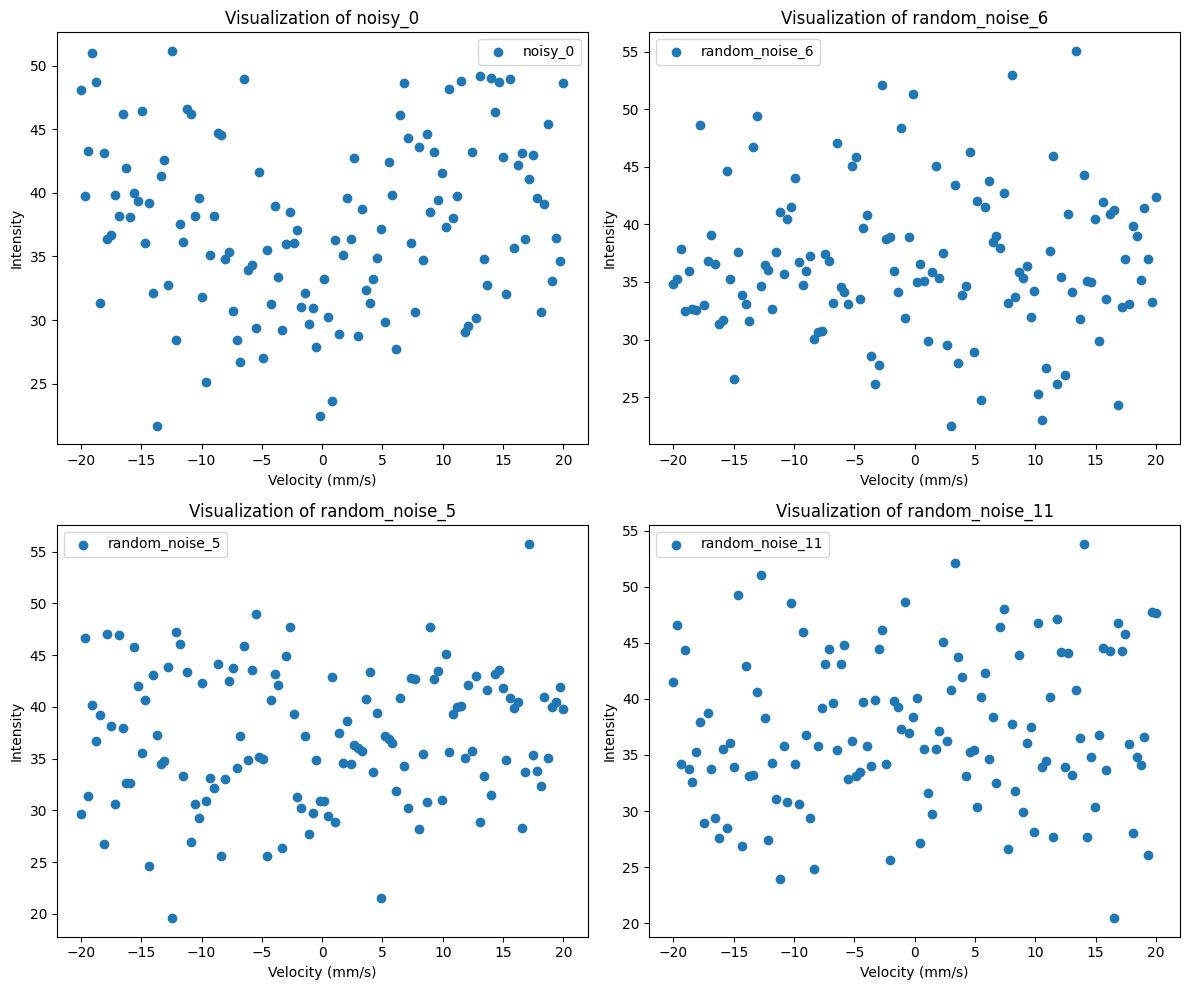

In [22]:
import matplotlib.pyplot as plt

# 指定されたカラムのデータをプロット
columns_to_visualize = ['noisy_0', 'random_noise_6', 'random_noise_5', 'random_noise_11']

# 2x2のグリッドでプロット
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 各カラムのデータをプロット
for ax, column in zip(axes.ravel(), columns_to_visualize):
    ax.scatter(dataset['Velocity (mm/s)'], dataset[column], label=column)
    ax.set_xlabel('Velocity (mm/s)')
    ax.set_ylabel('Intensity')
    ax.legend()
    ax.set_title(f'Visualization of {column}')

plt.tight_layout()
plt.show()

# その他のデータで同じことをする

## EuF3_w1T7_8S5_85

In [23]:
# 空のデータフレームを作成
dataset_w1 = pd.DataFrame()

# データ数の設定
number = 25
random_number = 25

# 元データからノイズを付加したデータを作成
for i in range(number):
    np.random.seed(i + 10)
    column_name = f'noisy_{i}'
    # 正規乱数のノイズは、平均0、分散は各x軸のデータのy軸値
    variance = data['EuF3_w1T7_8S5_85'].values
    noise = np.random.normal(0, np.sqrt(variance))
    dataset_w1[column_name] = data['EuF3_w1T7_8S5_85'] + noise

# 乱数のみのデータを作成
for i in range(random_number):
    j = i + number
    np.random.seed(j + 10)
    column_name = f'random_noise_{i}'
    # 正規乱数のノイズは、平均は0行目のデータの値、分散も0行目のデータの値
    noise = np.random.normal(row_at_zero_index['EuF3_w1T7_8S5_85'] \
                             , np.sqrt(row_at_zero_index['EuF3_w1T7_8S5_85']), size=data['EuF3_w1T7_8S5_85'].shape)
    dataset_w1[column_name] = noise

# 教師信号を作成
y = [1]*number + [0]*random_number

# datasetの最初の列に元データの最初の列を追加
dataset_w1.insert(0, "Velocity (mm/s)", data["Velocity (mm/s)"])

In [24]:
# 確認
dataset_w1.head()

,Velocity (mm/s),noisy_0,noisy_1,noisy_2,noisy_3,noisy_4,noisy_5,noisy_6,noisy_7,noisy_8,...,random_noise_15,random_noise_16,random_noise_17,random_noise_18,random_noise_19,random_noise_20,random_noise_21,random_noise_22,random_noise_23,random_noise_24
0,-20.000000,12.956106,14.207506,10.384834,6.834958,13.614204,8.033034,9.351543,9.795712,9.206238,...,4.295548,8.098395,10.524058,9.584880,3.421512,4.105745,5.860917,8.575907,6.691824,3.969328
1,-19.685039,11.181424,8.172066,6.983914,11.297090,9.269777,10.051450,4.438286,3.458095,15.614005,...,8.875602,9.304164,5.168814,12.462501,5.731078,8.663557,10.746214,8.367492,2.674708,10.655052
2,-19.370079,4.436061,7.635713,9.828477,8.963012,9.621982,8.626995,7.304228,10.979028,8.690384,...,7.108862,12.714158,9.688363,2.761388,9.203649,3.548547,12.270596,3.906920,6.543374,10.227304
3,-19.055118,9.136395,1.130596,4.013914,10.529336,8.942820,7.642933,9.362543,12.628447,9.647634,...,4.582357,4.892882,6.560741,7.073648,4.913109,9.754947,7.434541,6.589308,8.945859,4.172743
4,-18.740157,11.108081,9.196138,11.508333,13.305910,3.134832,9.936638,5.469520,12.370889,10.565618,...,13.196760,9.267643,9.020312,11.954490,10.843513,9.746858,8.173512,13.544315,3.864282,10.862045


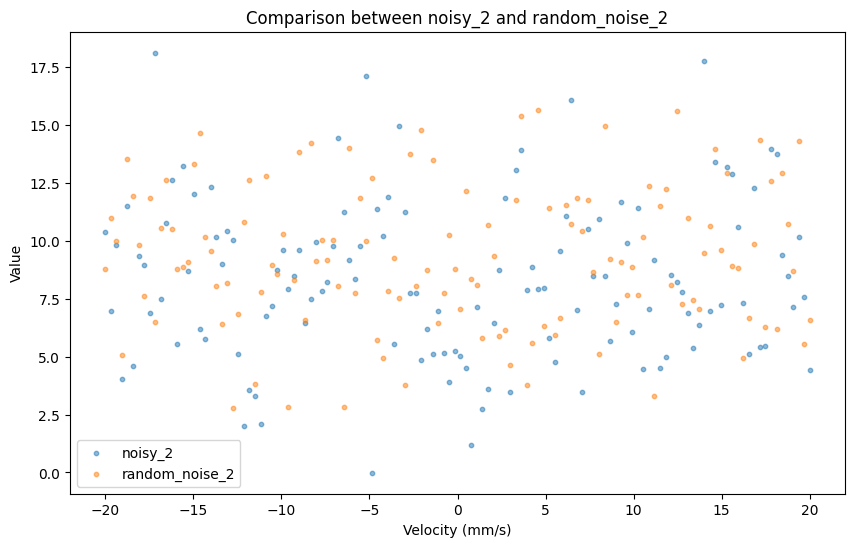

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(dataset_w1["Velocity (mm/s)"], dataset_w1["noisy_2"], label="noisy_2", alpha=0.5, s=10)
plt.scatter(dataset_w1["Velocity (mm/s)"], dataset_w1["random_noise_2"], label="random_noise_2", alpha=0.5, s=10)
plt.xlabel("Velocity (mm/s)")
plt.ylabel("Value")
plt.legend()
plt.title("Comparison between noisy_2 and random_noise_2")
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



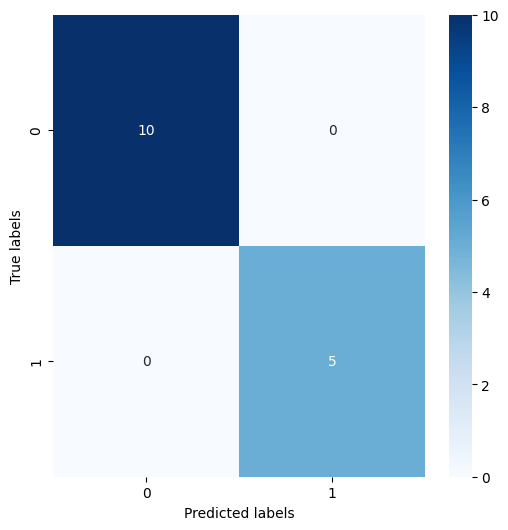

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 入力データとして、各カラムを1つのサンプルとする
X = dataset_w1.drop('Velocity (mm/s)', axis=1)
y = y

# データセットをトレーニングセットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X.T, y, test_size=0.3, random_state=111)

# ロジスティック回帰モデルを訓練
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

# テストデータを使って予測
y_pred = clf.predict(X_test)

# 評価
print(classification_report(y_test, y_pred))

# 混同行列の可視化
plt.figure(figsize=(6, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [27]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
random_noise_8,9.739213,6.247720,7.834859,7.366447,11.538064,7.731521,10.460309,14.988363,12.750293,7.653044,...,8.696465,6.497486,7.965230,11.119634,2.920640,8.495118,7.218809,8.757823,14.278560,7.630840
random_noise_5,7.148934,8.590628,6.918164,11.749616,3.444900,7.569828,15.833747,10.432223,11.095425,12.129406,...,4.212479,6.189236,7.311791,8.331841,6.771772,10.078602,12.055640,9.878748,10.684638,5.319038
random_noise_6,8.157663,9.282363,9.718633,6.197653,10.666810,5.853319,8.508154,11.333760,5.296194,6.129352,...,5.919079,3.224585,7.821557,13.868805,4.465582,8.934204,11.245015,10.449616,9.236655,7.966264
random_noise_9,6.720488,12.910498,12.700217,4.162092,4.571687,3.832209,14.534916,9.230673,8.811681,10.631856,...,8.732628,13.392157,12.346807,5.719967,3.424758,12.960753,15.679290,6.623298,9.697718,5.943542
noisy_16,9.555317,3.197811,11.250134,11.165989,8.526320,10.099071,9.220943,3.958319,6.917522,11.248755,...,9.842280,9.345071,2.971172,8.108867,5.200397,15.034315,9.880551,9.359995,4.116875,4.132606
random_noise_4,13.175478,9.630568,8.533156,9.337319,10.783255,16.223899,3.228658,1.713572,10.903844,9.571810,...,10.050745,10.199783,12.206089,6.455877,7.030589,6.680413,7.438791,14.001092,7.382646,6.677284
noisy_0,12.956106,11.181424,4.436061,9.136395,11.108081,7.078997,10.119758,9.665810,9.358815,8.811627,...,10.180102,4.397606,7.583204,5.280728,13.035769,16.707646,13.348597,10.141536,12.104763,9.467922
noisy_17,12.818405,8.119532,10.964474,10.360396,9.899702,9.106149,8.762635,10.076071,11.855725,13.065944,...,7.535155,11.790558,12.573820,11.832496,3.688852,13.779621,9.754639,14.833821,9.146766,10.778248
random_noise_21,5.860917,10.746214,12.270596,7.434541,8.173512,4.125885,8.155261,11.800046,7.090701,8.171933,...,8.906468,8.903144,11.769332,7.229762,6.571717,8.190577,7.124657,4.887709,6.539940,5.719418
random_noise_10,9.047357,9.747963,7.785020,8.356547,5.160183,1.191437,9.835886,6.353065,10.148510,11.768755,...,6.099496,8.366220,9.878537,8.253929,10.644455,4.839021,13.070578,3.540608,9.362708,14.239699


In [28]:
# X_testの列名と予測結果を表示
for column_name, prediction in zip(X_test.index, y_pred):
    print(f"Sample: {column_name}, Prediction: {prediction}")

Sample: random_noise_8, Prediction: 0
Sample: random_noise_5, Prediction: 0
Sample: random_noise_6, Prediction: 0
Sample: random_noise_9, Prediction: 0
Sample: noisy_16, Prediction: 1
Sample: random_noise_4, Prediction: 0
Sample: noisy_0, Prediction: 1
Sample: noisy_17, Prediction: 1
Sample: random_noise_21, Prediction: 0
Sample: random_noise_10, Prediction: 0
Sample: noisy_15, Prediction: 1
Sample: random_noise_11, Prediction: 0
Sample: noisy_9, Prediction: 1
Sample: random_noise_13, Prediction: 0
Sample: random_noise_23, Prediction: 0


すべてのテストデータについて判別ができた

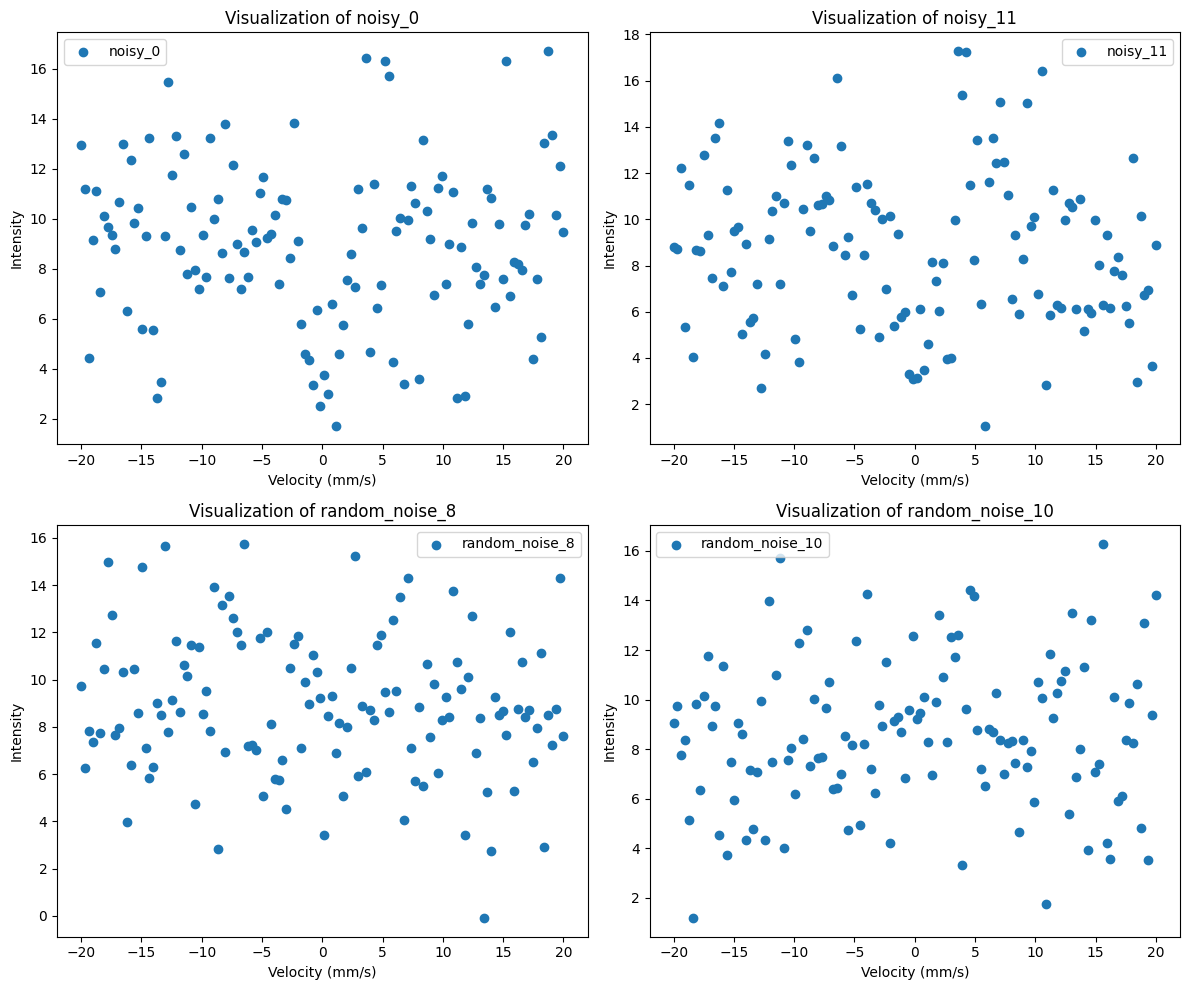

In [29]:
import matplotlib.pyplot as plt

# 指定されたカラムのデータをプロット
columns_to_visualize = ['noisy_0', 'noisy_11', 'random_noise_8', 'random_noise_10']

# 2x2のグリッドでプロット
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 各カラムのデータをプロット
for ax, column in zip(axes.ravel(), columns_to_visualize):
    ax.scatter(dataset_w1['Velocity (mm/s)'], dataset_w1[column], label=column)
    ax.set_xlabel('Velocity (mm/s)')
    ax.set_ylabel('Intensity')
    ax.legend()
    ax.set_title(f'Visualization of {column}')

plt.tight_layout()
plt.show()

## EuF3_w2T7_8S5_85

In [30]:
# 空のデータフレームを作成
dataset_w2 = pd.DataFrame()

# データ数の設定
number = 25
random_number = 25

# 元データからノイズを付加したデータを作成
for i in range(number):
    np.random.seed(i + 20)
    column_name = f'noisy_{i}'
    # 正規乱数のノイズは、平均0、分散は各x軸のデータのy軸値
    variance = data['EuF3_w2T7_8S5_85'].values
    noise = np.random.normal(0, np.sqrt(variance))
    dataset_w2[column_name] = data['EuF3_w2T7_8S5_85'] + noise

# 乱数のみのデータを作成
for i in range(random_number):
    j = i + number
    np.random.seed(j + 20)
    column_name = f'random_noise_{i}'
    # 正規乱数のノイズは、平均は0行目のデータの値、分散も0行目のデータの値
    noise = np.random.normal(row_at_zero_index['EuF3_w2T7_8S5_85'] \
                             , np.sqrt(row_at_zero_index['EuF3_w2T7_8S5_85']), size=data['EuF3_w2T7_8S5_85'].shape)
    dataset_w2[column_name] = noise

# 教師信号を作成
y = [1]*number + [0]*random_number

# datasetの最初の列に元データの最初の列を追加
dataset_w2.insert(0, "Velocity (mm/s)", data["Velocity (mm/s)"])

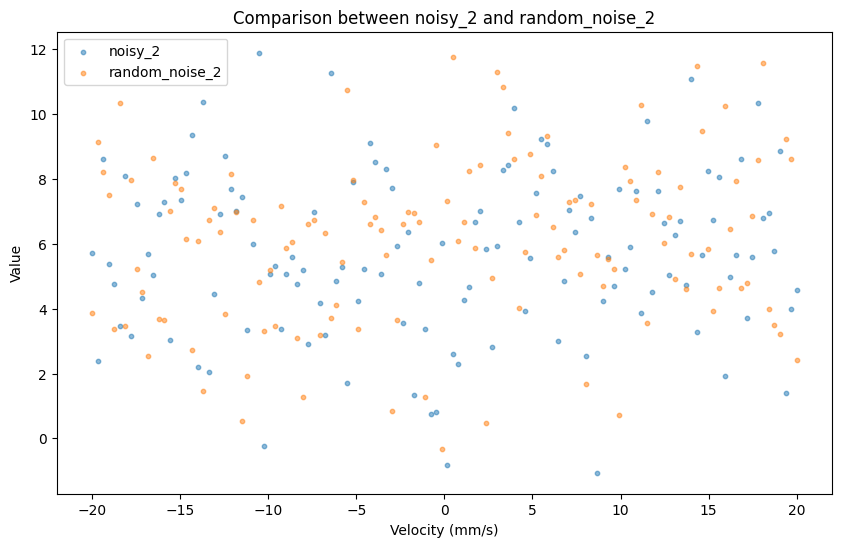

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(dataset_w2["Velocity (mm/s)"], dataset_w2["noisy_2"], label="noisy_2", alpha=0.5, s=10)
plt.scatter(dataset_w2["Velocity (mm/s)"], dataset_w2["random_noise_2"], label="random_noise_2", alpha=0.5, s=10)
plt.xlabel("Velocity (mm/s)")
plt.ylabel("Value")
plt.legend()
plt.title("Comparison between noisy_2 and random_noise_2")
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



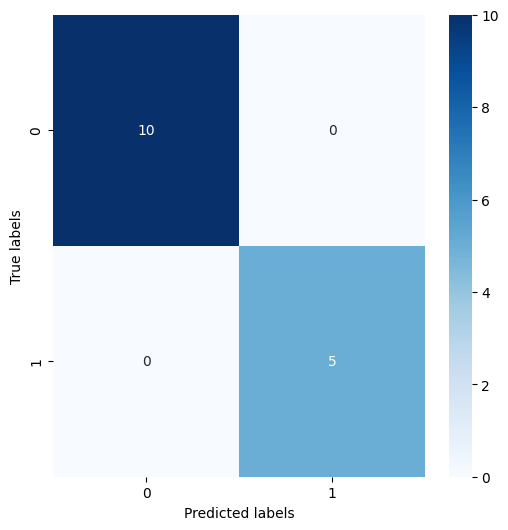

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 入力データとして、各カラムを1つのサンプルとする
X = dataset_w2.drop('Velocity (mm/s)', axis=1)
y = y

# データセットをトレーニングセットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X.T, y, test_size=0.3, random_state=111)

# ロジスティック回帰モデルを訓練
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

# テストデータを使って予測
y_pred = clf.predict(X_test)

# 評価
print(classification_report(y_test, y_pred))

# 混同行列の可視化
plt.figure(figsize=(6, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [33]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
random_noise_8,6.446560,8.789382,0.891199,4.402036,8.375783,11.782936,4.625014,7.779846,0.701725,5.199916,...,7.043476,9.486373,9.696528,8.449424,11.359285,6.581084,7.617537,7.001059,1.742910,10.698243
random_noise_5,2.140239,5.869100,4.430705,2.373746,9.387181,4.782279,4.041719,8.554114,2.818193,2.708022,...,3.261458,3.123049,10.352933,3.235396,8.066841,7.770745,7.674583,6.715452,4.047217,4.637868
random_noise_6,5.236335,6.218015,8.994269,2.626560,6.188281,5.827619,5.076083,3.290546,5.088791,12.255564,...,7.567935,-0.397487,0.609281,6.837548,8.713959,8.863752,8.203736,2.249681,5.689243,5.411898
random_noise_9,1.428641,3.308979,6.136180,2.643028,7.471279,7.732746,2.358146,1.859686,7.366144,4.292870,...,3.640508,3.159477,6.463739,5.866872,1.224350,4.961504,4.712969,7.084421,9.406824,7.495971
noisy_16,7.593833,9.683888,4.725583,8.780581,4.506491,4.040052,5.047350,6.023373,2.437475,6.218428,...,8.369723,9.059049,5.270877,2.191529,4.920145,4.652248,5.665916,1.478745,10.141629,10.070604
random_noise_4,3.401239,3.943250,7.566361,10.388486,2.429816,6.514690,6.772675,6.508365,5.920428,10.342700,...,1.046825,4.109190,6.349862,4.298065,5.540135,6.691556,2.263438,4.210992,4.976250,5.329010
noisy_0,8.099702,6.446425,6.851118,0.244674,3.301512,7.269269,8.132061,3.443037,6.942011,6.643666,...,4.805772,6.926858,6.496728,4.720115,9.812601,5.572318,1.605875,5.704036,9.724306,3.429343
noisy_17,5.811838,7.615231,6.824496,2.792933,9.650176,8.314820,6.530287,4.719121,8.041096,3.703898,...,9.958975,3.570948,8.697514,3.614393,9.119137,7.371274,5.732389,10.337283,3.177819,3.992349
random_noise_21,9.396124,3.298526,4.441971,4.099145,6.790787,9.739605,-1.263425,9.258286,7.525403,6.642013,...,5.673659,4.506368,7.929239,6.575409,10.301737,7.407585,6.436491,7.746316,4.787238,5.847763
random_noise_10,1.985711,5.696463,1.532067,6.585021,6.578435,5.015479,5.939046,6.777542,8.133054,5.064209,...,8.147772,1.505792,10.554696,5.063535,17.616996,10.345056,4.099585,5.490809,7.018692,11.294015


In [34]:
# X_testの列名と予測結果を表示
for column_name, prediction in zip(X_test.index, y_pred):
    print(f"Sample: {column_name}, Prediction: {prediction}")

Sample: random_noise_8, Prediction: 0
Sample: random_noise_5, Prediction: 0
Sample: random_noise_6, Prediction: 0
Sample: random_noise_9, Prediction: 0
Sample: noisy_16, Prediction: 1
Sample: random_noise_4, Prediction: 0
Sample: noisy_0, Prediction: 1
Sample: noisy_17, Prediction: 1
Sample: random_noise_21, Prediction: 0
Sample: random_noise_10, Prediction: 0
Sample: noisy_15, Prediction: 1
Sample: random_noise_11, Prediction: 0
Sample: noisy_9, Prediction: 1
Sample: random_noise_13, Prediction: 0
Sample: random_noise_23, Prediction: 0


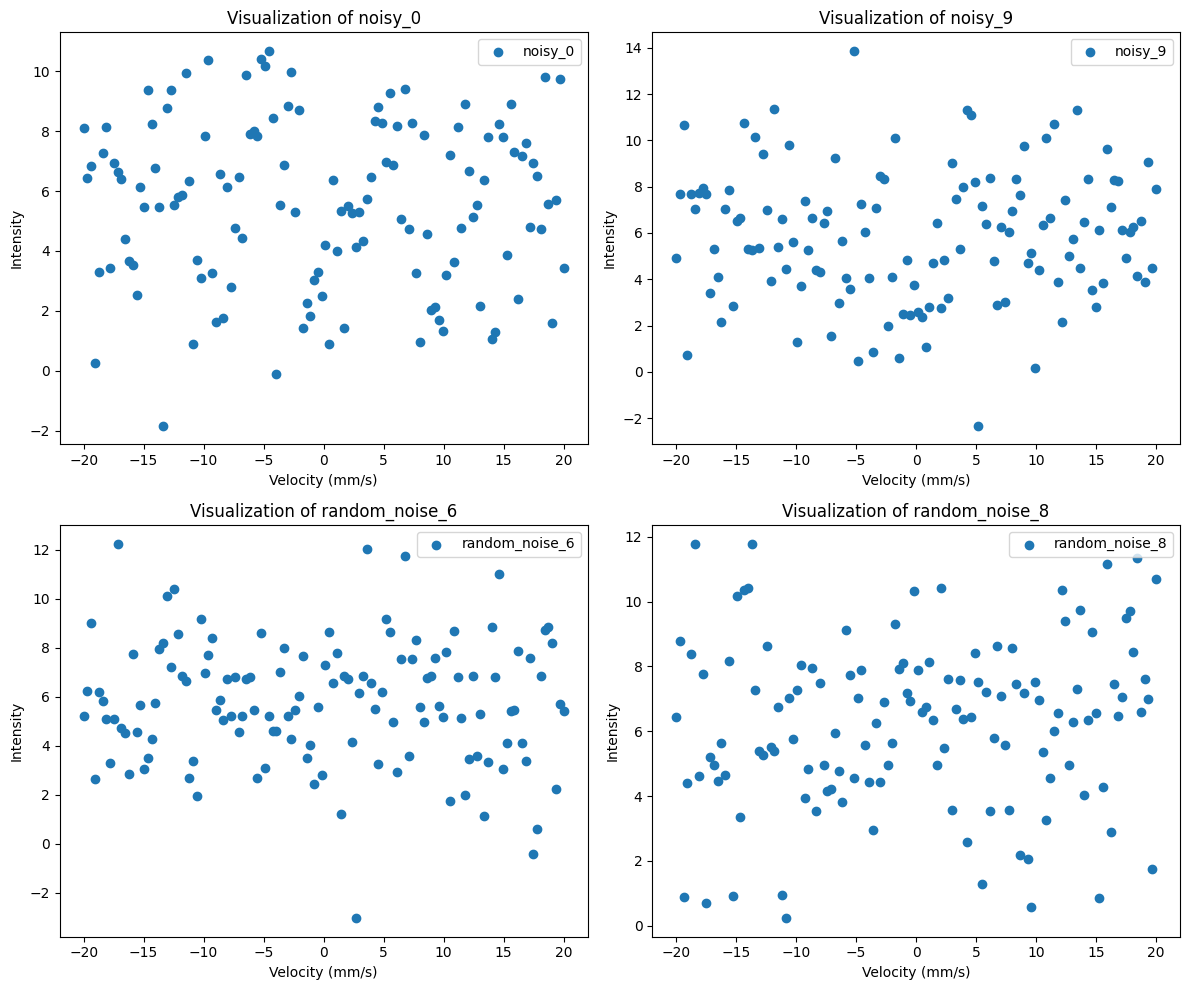

In [35]:

import matplotlib.pyplot as plt

# 指定されたカラムのデータをプロット
columns_to_visualize = ['noisy_0', 'noisy_9', 'random_noise_6', 'random_noise_8']

# 2x2のグリッドでプロット
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 各カラムのデータをプロット
for ax, column in zip(axes.ravel(), columns_to_visualize):
    ax.scatter(dataset_w2['Velocity (mm/s)'], dataset_w2[column], label=column)
    ax.set_xlabel('Velocity (mm/s)')
    ax.set_ylabel('Intensity')
    ax.legend()
    ax.set_title(f'Visualization of {column}')

plt.tight_layout()
plt.show()

## EuF3_w3T7_8S5_85

In [36]:
# 空のデータフレームを作成
dataset_w3 = pd.DataFrame()

# データ数の設定
number = 25
random_number = 25

# 元データからノイズを付加したデータを作成
for i in range(number):
    np.random.seed(i + 10)
    column_name = f'noisy_{i}'
    # 正規乱数のノイズは、平均0、分散は各x軸のデータのy軸値
    variance = data['EuF3_w3T7_8S5_85'].values
    noise = np.random.normal(0, np.sqrt(variance))
    dataset_w3[column_name] = data['EuF3_w3T7_8S5_85'] + noise

# 乱数のみのデータを作成
for i in range(random_number):
    j = i + number
    np.random.seed(j + 10)
    column_name = f'random_noise_{i}'
    # 正規乱数のノイズは、平均は0行目のデータの値、分散も0行目のデータの値
    noise = np.random.normal(row_at_zero_index['EuF3_w3T7_8S5_85'] \
                             , np.sqrt(row_at_zero_index['EuF3_w3T7_8S5_85']), size=data['EuF3_w3T7_8S5_85'].shape)
    dataset_w3[column_name] = noise

# 教師信号を作成
y = [1]*number + [0]*random_number

# datasetの最初の列に元データの最初の列を追加
dataset_w3.insert(0, "Velocity (mm/s)", data["Velocity (mm/s)"])

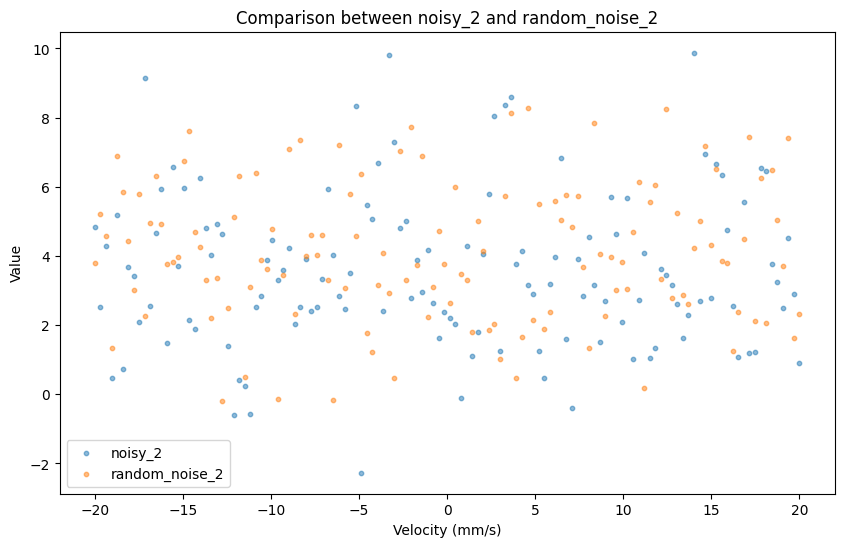

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(dataset_w3["Velocity (mm/s)"], dataset_w3["noisy_2"], label="noisy_2", alpha=0.5, s=10)
plt.scatter(dataset_w3["Velocity (mm/s)"], dataset_w3["random_noise_2"], label="random_noise_2", alpha=0.5, s=10)
plt.xlabel("Velocity (mm/s)")
plt.ylabel("Value")
plt.legend()
plt.title("Comparison between noisy_2 and random_noise_2")
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



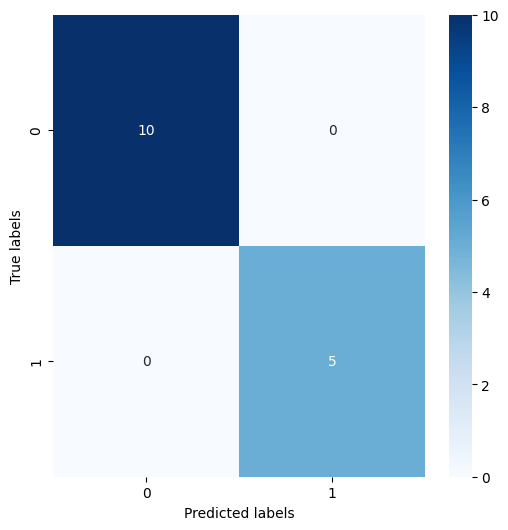

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 入力データとして、各カラムを1つのサンプルとする
X = dataset_w3.drop('Velocity (mm/s)', axis=1)
y = y

# データセットをトレーニングセットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X.T, y, test_size=0.3, random_state=111)

# ロジスティック回帰モデルを訓練
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

# テストデータを使って予測
y_pred = clf.predict(X_test)

# 評価
print(classification_report(y_test, y_pred))

# 混同行列の可視化
plt.figure(figsize=(6, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [39]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
random_noise_8,4.400285,2.100082,3.145692,2.837101,5.585371,3.077613,4.875344,7.858435,6.383990,3.025912,...,3.713320,2.264628,3.231581,5.309708,-0.091805,3.580672,2.739837,3.753743,7.390815,3.011284
random_noise_5,2.693803,3.643594,2.541772,5.724742,0.253578,2.971089,8.415375,4.856840,5.293759,5.974948,...,0.759261,2.061553,2.801094,3.473105,2.445328,4.623875,5.926351,4.492210,5.023132,1.488264
random_noise_6,3.358356,4.099310,4.386726,2.067098,5.011387,1.840250,3.589261,5.450775,1.473215,2.022101,...,1.883573,0.108435,3.136929,7.120867,0.926006,3.869943,5.392310,4.868299,4.069198,3.232262
random_noise_9,2.411542,6.489533,6.350999,0.726066,0.995908,0.508739,7.559702,4.065257,3.789224,4.988359,...,3.737144,6.806851,6.118172,1.752397,0.240309,6.522641,8.313618,2.347513,4.372947,1.899689
noisy_16,4.279133,0.048727,5.222412,5.068180,3.292379,4.215932,3.606876,0.285758,2.128509,4.854650,...,3.974103,3.644535,-0.331131,2.909355,1.124004,7.434062,4.242433,3.996603,0.649965,0.706641
random_noise_4,6.664103,4.328709,3.605732,4.135516,5.088101,8.672408,0.111118,-0.887024,5.167546,4.289999,...,4.605522,4.703709,6.025467,2.237216,2.615838,2.385141,2.884762,7.208018,2.847774,2.383080
noisy_0,6.519579,5.271492,0.803293,3.764397,4.935410,2.309733,4.170635,3.852491,3.653118,3.328845,...,4.185602,0.554800,2.551026,1.135477,6.069507,8.498969,6.470258,4.503455,5.875526,4.221557
noisy_17,6.428862,3.268446,5.037154,4.550679,4.166399,3.589223,3.319414,4.108872,5.212460,5.992331,...,2.529688,5.171762,5.669769,5.244906,0.169953,6.635576,4.161549,7.546535,3.940447,5.084803
random_noise_21,1.845255,5.063698,6.067964,2.881962,3.368798,0.702213,3.356773,5.757965,2.655440,3.367757,...,3.851670,3.849480,5.737731,2.747053,2.313532,3.380040,2.677810,1.204104,2.292597,1.752036
random_noise_10,3.944488,4.406049,3.112858,3.489381,1.383610,-1.231007,4.463973,2.169484,4.669930,5.737350,...,2.002432,3.495754,4.492071,3.421776,4.996659,1.172029,6.594994,0.316631,4.152242,7.365213


In [40]:
# X_testの列名と予測結果を表示
for column_name, prediction in zip(X_test.index, y_pred):
    print(f"Sample: {column_name}, Prediction: {prediction}")

Sample: random_noise_8, Prediction: 0
Sample: random_noise_5, Prediction: 0
Sample: random_noise_6, Prediction: 0
Sample: random_noise_9, Prediction: 0
Sample: noisy_16, Prediction: 1
Sample: random_noise_4, Prediction: 0
Sample: noisy_0, Prediction: 1
Sample: noisy_17, Prediction: 1
Sample: random_noise_21, Prediction: 0
Sample: random_noise_10, Prediction: 0
Sample: noisy_15, Prediction: 1
Sample: random_noise_11, Prediction: 0
Sample: noisy_9, Prediction: 1
Sample: random_noise_13, Prediction: 0
Sample: random_noise_23, Prediction: 0


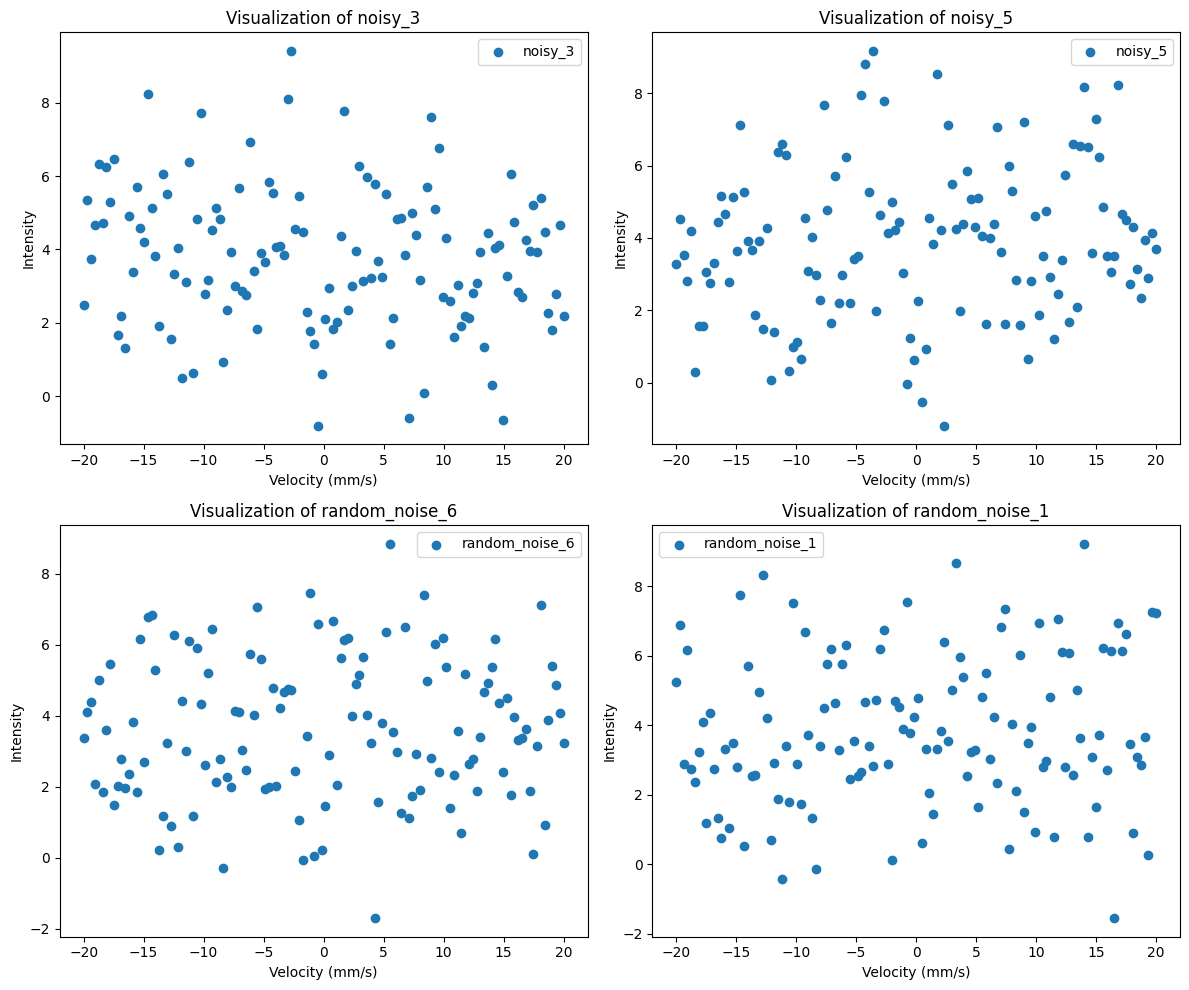

In [41]:
import matplotlib.pyplot as plt

# 指定されたカラムのデータをプロット
columns_to_visualize = ['noisy_3', 'noisy_5', 'random_noise_6', 'random_noise_1']

# 2x2のグリッドでプロット
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 各カラムのデータをプロット
for ax, column in zip(axes.ravel(), columns_to_visualize):
    ax.scatter(dataset_w3['Velocity (mm/s)'], dataset_w3[column], label=column)
    ax.set_xlabel('Velocity (mm/s)')
    ax.set_ylabel('Intensity')
    ax.legend()
    ax.set_title(f'Visualization of {column}')

plt.tight_layout()
plt.show()